<a href="https://colab.research.google.com/github/SuvirKapse/Hotel-Booking-Analysis/blob/main/Suvir_kapse_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# **Descriptive Analysis of dataset**

In [15]:
from google.colab import drive
drive.mount('/content/drive')

file_path ='/content/drive/MyDrive/pandafiles/Hotel Bookings.csv'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
# Importing the required libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [17]:
# Reading the datset using pandas
hotel_df = pd.read_csv(file_path)

# ***Information  About The Data***

In [18]:
# Display first 5 indexes of the dataset .
hotel_df.head(15)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.00,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.00,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.00,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.50,0,0,Canceled,2015-04-22


In [19]:
# Information about the  dataset  and its each column.
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            



*   Hotel:- Type of hotel ( Resort hotel or  City hotel)

*   is_canceled :-  Booking is canceled(1) or not canceled(0) 

*  lead_time :-  Number  of days thaat elapsed between date of booking and arrival date

*   arrival_date_year :- Year of arrival date (2015-2017)

* arrival_date_month :-   Month of arrival date (Jan - Dec)

* arrival_date_week_numberr :-   Week number of year for arrival date (1-53)

* arrival_date_day_of_month :-  Day of arrival date

*  stays_in_weekend_nights :-  Number  of weekend nights (Sat/Sun) the guest stayed or booked to stay at the hotel

* stays_in_week_nights :- Number  of week nights (Mon - Fri) the guest stayed or booked to stay at the hotel

* Adults :- Number of bookings for adults 

* Children :- Number of bookings for children

* Babies :- Number of bookings for babies

* meal :- Type of meal booked

* country :-  country from which bookings were made

*  market_segment :- The term market segment refers to people who are grouped together for marketing purposes 

*   distribution_channel :-  A distribution channel is a chain of businesses or intermediaries through which a good or service passes until it reaches the final buyer or the end consumer

*   is_repeated_guest :- If the guest have made previous booking at same hotel or not .(1 = yes , 0 = no)

*   previous_cancellations :-Number of previous bookings that were cancelled by the customer

*  previous_bookings_not_canceled :- Number of previous bookings not cancelled by the customer

*   reserved_room_type :- Type of room reserved.

*   assigned_room_type :-Type of room assinged.

*   booking_changes :- Number of changes made to the booking request 

*   deposit_type :- If advance payment were made and of what type (refundable or non refundable)

*  agent :-ID of the travel agency that made the booking

*   company :- ID of the company that made the booking or responsible for paying the booking

*   customer_type :- type of customer (Contract,Group,Transient,Transient-party)

* adr :-   average daily rate

*  required_car_parking_spaces:-Number of car parking spaces required by the customer

*   total_of_special_requests :- Number of special requests made by the customer

* reservation_status :- Current status of booking (Canceled ,Check-Out,No-Show)

*   reservation_status_date :- Date at which the last status was set











# ***Checking for Missing And Duplicate values***

In [20]:
''' To Checking the sum of Missing/null values,if present any we can replace or 
delete those null value'''
hotel_df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

 # ***The Columns With High Missing Values Are To Be  Dropped***

In [21]:
# Droping the columns with high missing value i.e agent & company

hotel_df = hotel_df.drop(['agent','company'],axis=1)

# ***The column country has 488 missing values, i.e 0.408 % of the total, so removing those rows with missing values as  those values can't be filled.***

In [22]:
# Removing the rows with missing value

hotel_df = hotel_df.dropna()

In [23]:
# Checking that there's no missing data missing.

hotel_df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

# **Descriptive Analysis of dataset**

In [24]:
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [25]:
# types of hotel in data set

hotel_df.hotel.unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

#**Comparing the number of booking in resort hotel & city hotel**

([<matplotlib.patches.Wedge at 0x7fc5c78fc090>,
 [Text(-1.904189190864349, -1.1018455088601928, 'City Hotel'),
  Text(2.077297186584129, 1.2020134768835427, 'Resort Hotel')],
 [Text(-1.038648649562372, -0.6010066411964687, '66.7%'),
  Text(1.2117566921740752, 0.7011745281820665, '33.3%')])

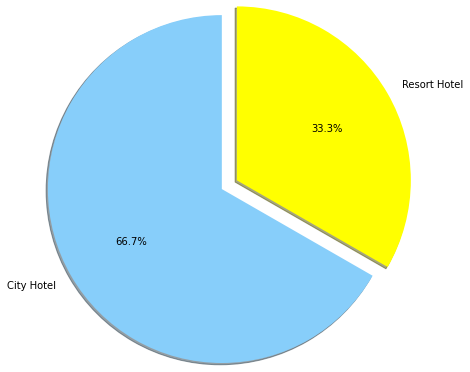

In [26]:
# comparing  the two values with pie chart 
data =hotel_df['hotel'].value_counts()

lable = hotel_df['hotel'].value_counts().index.tolist()

plt.pie(data, explode =(0, 0.2),autopct='%1.1f%%',startangle =90,shadow=True,radius = 2.0, 
        labels=lable,
        colors=['lightskyblue','yellow'])

# ***It seems people mostly preffered city hotels***


# ***lets check  the next  column i.e 'is_canceled'*** 

In [27]:
# for convenience lets replace (0,1) in  column with (canceled , not canceled)
hotel_df['is_canceled'] = hotel_df.is_canceled.replace([1,0], ['canceled', 'not_canceled'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


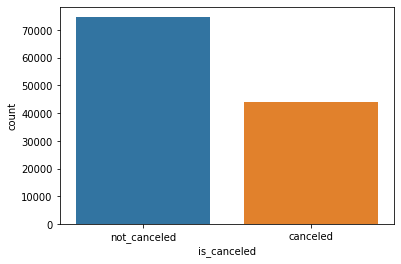

In [28]:
canceled_data = hotel_df['is_canceled']
sns.countplot(canceled_data)

Most of the booking were not canceled but there is still huge amount of cancelation 


# ***Lets check its relation with hotel type***

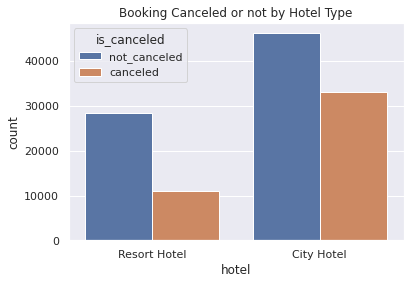

In [29]:
sns.set(style = "darkgrid")
plt.title("Booking Canceled or not by Hotel Type")
ax = sns.countplot(x = "hotel", hue = 'is_canceled', data = hotel_df)

cancelation rate is higher in city hotel

#***Lets look over the trend through years***

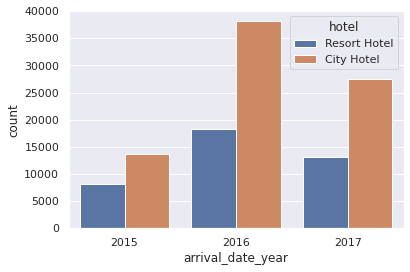

In [30]:
sns.countplot(data = hotel_df, x = 'arrival_date_year', hue = 'hotel')

Though there is no linear trend over the year a spike in booking in year 2016 is observed .

# ***Lets check how months affect the booking rates***

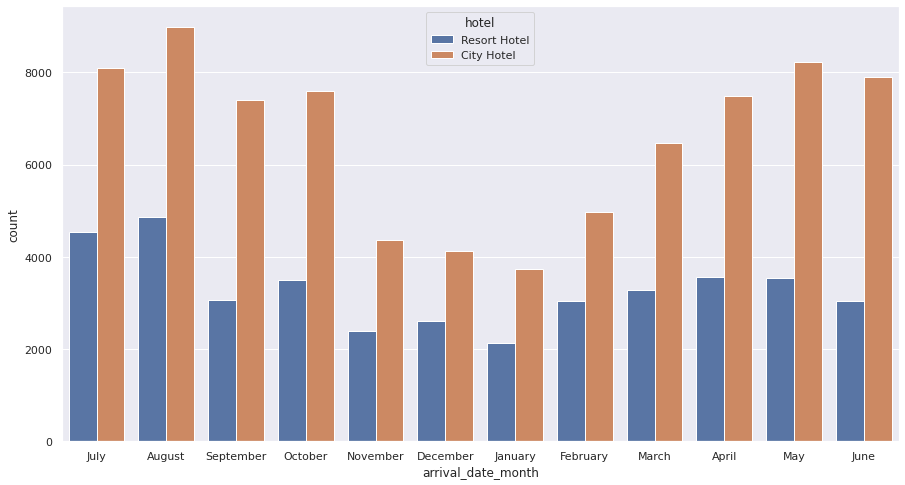

In [31]:
sns.set(style="darkgrid")                                                    
plt.figure(figsize=(15,8))
ax = sns.countplot(x='arrival_date_month', hue="hotel", data=hotel_df)
plt.show()

Bookings are lowest in months of Nov - feb 

#***Looking into which countries the visitors are from***

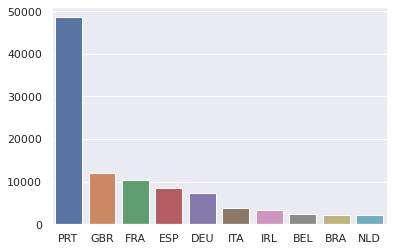

In [32]:
sns.barplot (y= list(hotel_df.country.value_counts().head (10)), x= list(hotel_df.country.value_counts().head(10).index))

# ***Lets have a look in market_segment & distribution_channel***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


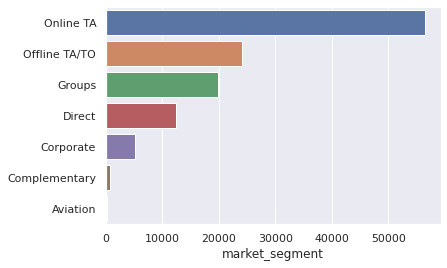

In [33]:
x =hotel_df['market_segment'].value_counts()

y = hotel_df['market_segment'].value_counts().index.tolist()

sns.barplot(x,y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


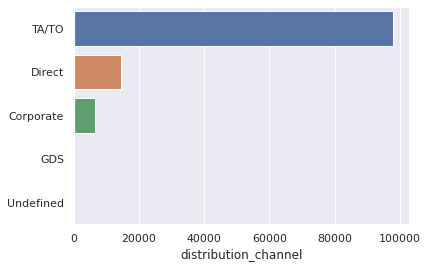

In [34]:
a =hotel_df['distribution_channel'].value_counts()

b = hotel_df['distribution_channel'].value_counts().index.tolist()

sns.barplot(a,b)

From above comparisons majority of the distribution channels and market segments involve travel agencies (online or offline).

#***Lets check how many guest returned***

([<matplotlib.patches.Wedge at 0x7fc5c701d310>,
 [Text(-0.11043438343052156, -1.0944424365659076, '0'),
  Text(0.13051330168614994, 1.2934319765967517, '1')],
 [Text(-0.06023693641664811, -0.5969686017632223, '96.8%'),
  Text(0.08031587796070766, 0.7959581394441549, '3.2%')])

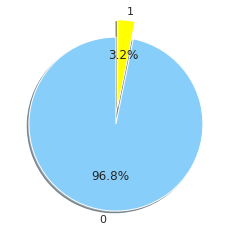

In [35]:
c =hotel_df['is_repeated_guest'].value_counts()

d = hotel_df['is_repeated_guest'].value_counts().index.tolist()

plt.pie(c, explode =(0, 0.2),autopct='%1.1f%%',startangle =90,shadow=True,radius = 1.0, 
        labels=d,
        colors=['lightskyblue','yellow'])

The retention is very low as only 3.2% guest returned 

#***Lets look over the deposit_type***

In [36]:
hotel_df['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

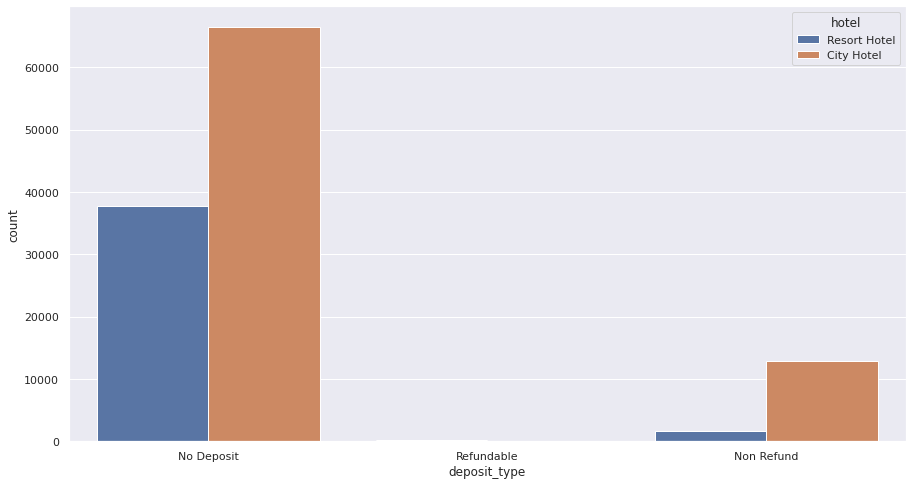

In [37]:
sns.set(style="darkgrid")                                                    
plt.figure(figsize=(15,8))
ax = sns.countplot(x='deposit_type', hue="hotel", data=hotel_df)
plt.show()

#***Overview of repeated guests***

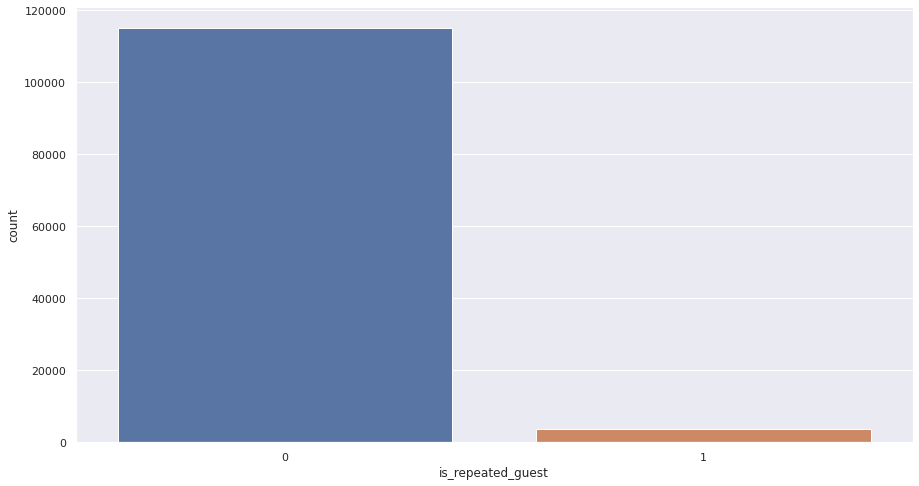

In [41]:
plt.figure(figsize=(15,8))
sns.countplot(data =hotel_df , x = 'is_repeated_guest')

#***adr***

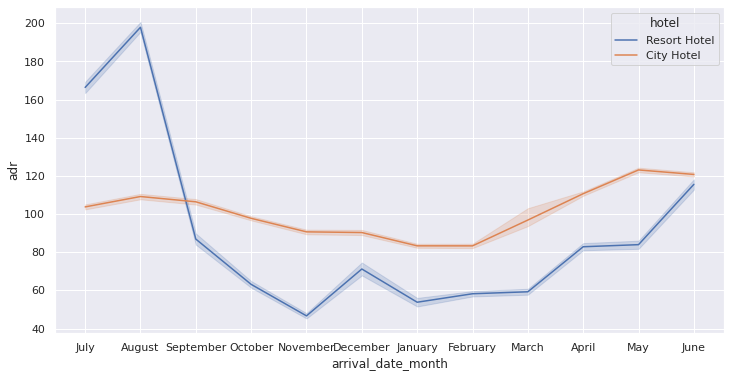

In [61]:
plt.figure(figsize=(12,6))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data=hotel_df.loc[hotel_df["is_canceled"] == 'canceled'])


In [ ]:
|